# Working with the dataset

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
#pd.set_option('display.max_rows', None)

In [2]:
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
pio.templates.default = "plotly_dark"

In [3]:
circuits=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/circuits.csv')
constructor_results=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/constructor_results.csv')
constructor_standings=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/constructor_standings.csv')
constructors=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/constructors.csv')
driver_standings=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/driver_standings.csv')
drivers=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/drivers.csv')
lap_times=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/lap_times.csv')
pit_stops=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/pit_stops.csv')
qualifying=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/qualifying.csv')
races=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/races.csv')
results=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/results.csv')
seasons=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/seasons.csv')
status=pd.read_csv('https://raw.githubusercontent.com/frax0n/F1-Analysis/Frax/datasets/status.csv')

In [4]:
TH_races=races.loc[races['year']>=2014]

In [5]:
qualifying=qualifying.rename(columns={"position":"qualifying_pos"})

In [6]:
qualifying=qualifying.replace("\\N",np.nan)

In [7]:
qualifying['q1']=pd.to_datetime(qualifying['q1'],format="%M:%S.%f")
qualifying['q2']=pd.to_datetime(qualifying['q2'],format="%M:%S.%f")
qualifying['q3']=pd.to_datetime(qualifying['q3'],format="%M:%S.%f")

In [8]:
qualifying['q1_s']=qualifying['q1'].dt.minute*60+qualifying['q1'].dt.second+qualifying['q1'].dt.microsecond*0.000001
qualifying['q2_s']=qualifying['q2'].dt.minute*60+qualifying['q2'].dt.second+qualifying['q2'].dt.microsecond*0.000001
qualifying['q3_s']=qualifying['q3'].dt.minute*60+qualifying['q3'].dt.second+qualifying['q3'].dt.microsecond*0.000001

In [9]:
qualifying.drop(columns=['q1', 'q2', 'q3'],inplace=True)

In [10]:
qualifying['q1min']=qualifying['q1_s']
qualifying['q2min']=qualifying['q2_s']
qualifying['q3min']=qualifying['q3_s']

In [11]:
qualifying=qualifying.merge(qualifying.groupby('raceId').aggregate({'q1min':'min','q2min':'min','q3min':'min'}),left_on='raceId',right_on='raceId')

In [12]:
qualifying=qualifying.rename(columns={"q1min_y":"q1min","q2min_y":"q2min","q3min_y":"q3min"})

In [13]:
qualifying.drop(columns=['q1min_x','q2min_x','q3min_x'],inplace=True)

In [14]:
qualifying['q1_delta']=qualifying['q1min']
qualifying['q2_delta']=qualifying['q2min']
qualifying['q3_delta']=qualifying['q3min']

In [15]:
qualifying['q1_delta']=qualifying['q1_s']-qualifying['q1min']
qualifying['q2_delta']=qualifying['q2_s']-qualifying['q2min']
qualifying['q3_delta']=qualifying['q3_s']-qualifying['q3min']

In [16]:
qualifying.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos', 'q1_s', 'q2_s', 'q3_s', 'q1min', 'q2min', 'q3min',
       'q1_delta', 'q2_delta', 'q3_delta'],
      dtype='object')

In [17]:
qualifyingq1=qualifying[['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos','q1_s','q1_delta']]
qualifyingq2=qualifying[['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos','q2_s','q2_delta']]

qualifyingq3=qualifying[['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'qualifying_pos','q3_s','q3_delta']]


In [18]:
results_temp=results[['resultId', 'raceId', 'driverId', 'constructorId','position','statusId','rank']]
results_temp.rename(columns={'rank':'driverRanking','position':'final_position',},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
TH_races_temp=TH_races[['raceId','year','circuitId']]

In [20]:
constructor_standings_temp=constructor_standings[['constructorStandingsId', 'raceId', 'constructorId','position']]
constructor_standings_temp.rename(columns={'position':'constructor_ranking'},inplace=True)
constructor_standings_temp.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,constructorStandingsId,raceId,constructorId,constructor_ranking
0,1,18,1,1
1,2,18,2,3
2,3,18,3,2
3,4,18,4,4
4,5,18,5,5


In [21]:
pit_stops_temp=pit_stops.drop(columns=['time','duration'])
pit_stops_temp.head()

,raceId,driverId,stop,lap,milliseconds
0,841,153,1,1,26898
1,841,30,1,1,25021
2,841,17,1,11,23426
3,841,4,1,12,23251
4,841,13,1,13,23842


In [22]:
temp=qualifyingq2
temp=temp.dropna()
qualifyingq2=temp


In [23]:
temp=qualifyingq3
temp=temp.dropna()
qualifyingq3=temp


In [24]:
q1=qualifyingq1.merge(results_temp,left_on=['raceId','driverId','constructorId'],right_on=['raceId','driverId','constructorId'])
q1=q1.merge(constructor_standings_temp,left_on=['raceId','constructorId'],right_on=['raceId','constructorId'])
q1=q1.merge(TH_races_temp,left_on=['raceId'],right_on=['raceId'])
q1=q1.merge(pit_stops_temp,left_on=['raceId','driverId'],right_on=['raceId','driverId'])
q1=q1.loc[(q1['statusId']==1) | (q1['statusId']==11) | (q1['statusId']==12)]
q1.head()

,qualifyId,raceId,driverId,constructorId,number,qualifying_pos,q1_s,q1_delta,resultId,final_position,statusId,driverRanking,constructorStandingsId,constructor_ranking,year,circuitId,stop,lap,milliseconds
0,5862,900,3,131,6,3,92.564,1.789,22130,1,1,1,25931,2,2014,1,1,12,24331
1,5862,900,3,131,6,3,92.564,1.789,22130,1,1,1,25931,2,2014,1,2,38,23673
4,5863,900,825,1,20,4,90.949,0.174,22131,2,1,6,25932,1,2014,1,1,12,23150
5,5863,900,825,1,20,4,90.949,0.174,22131,2,1,6,25932,1,2014,1,2,37,22273
6,5870,900,18,1,22,11,91.396,0.621,22132,3,1,5,25932,1,2014,1,1,11,22411


In [25]:
q2=qualifyingq2.merge(results_temp,left_on=['raceId','driverId','constructorId'],right_on=['raceId','driverId','constructorId'])
q2=q2.merge(constructor_standings_temp,left_on=['raceId','constructorId'],right_on=['raceId','constructorId'])
q2=q2.merge(TH_races_temp,left_on=['raceId'],right_on=['raceId'])
q2=q2.merge(pit_stops_temp,left_on=['raceId','driverId'],right_on=['raceId','driverId'])
q2=q2.loc[(q2['statusId']==1) | (q2['statusId']==11) | (q2['statusId']==12)]

In [26]:
q3=qualifyingq3.merge(results_temp,left_on=['raceId','driverId','constructorId'],right_on=['raceId','driverId','constructorId'])
q3=q3.merge(constructor_standings_temp,left_on=['raceId','constructorId'],right_on=['raceId','constructorId'])
q3=q3.merge(TH_races_temp,left_on=['raceId'],right_on=['raceId'])
q3=q3.merge(pit_stops_temp,left_on=['raceId','driverId'],right_on=['raceId','driverId'])
q3=q3.loc[(q3['statusId']==1) | (q3['statusId']==11) | (q3['statusId']==12)]

# Machine Learning

In [27]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import svm

In [28]:
q1.drop(columns=['qualifyId','resultId','constructorStandingsId','raceId'],inplace=True)
q2.drop(columns=['qualifyId','resultId','constructorStandingsId','raceId'],inplace=True)
q3.drop(columns=['qualifyId','resultId','constructorStandingsId','raceId'],inplace=True)

In [29]:
q1['final_position']=q1['final_position'].astype(int)
q1['driverRanking']=q1['driverRanking'].astype(int)
q2['final_position']=q2['final_position'].astype(int)
q2['driverRanking']=q2['driverRanking'].astype(int)
q3['final_position']=q3['final_position'].astype(int)
q3['driverRanking']=q3['driverRanking'].astype(int)

In [30]:
test2=q2.merge(q1[['q1_s','q1_delta','driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds']],left_on=['driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds'],right_on=['driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds'])
test3=q3.merge(test2[['q1_s','q1_delta','driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds','q2_s','q2_delta']],
              left_on=['driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds'],
              right_on=['driverId', 'constructorId', 'number','year', 'circuitId', 'stop', 'lap',
                   'milliseconds'])

In [31]:
test=q1

In [32]:
#test=pd.get_dummies(q1,columns=['driverId','constructorId','circuitId'])
#test2=pd.get_dummies(test2,columns=['driverId','constructorId','circuitId'])
#test3=pd.get_dummies(test3,columns=['driverId','constructorId','circuitId'])

In [33]:
test=test.dropna()
test2=test2.dropna()
test3=test3.dropna()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(test.drop(columns=['final_position','qualifying_pos','number','statusId']), test['final_position'], test_size = 0.25, random_state=8)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(test2.drop(columns=['final_position','qualifying_pos','number','statusId']), test2['final_position'], test_size = 0.25, random_state=8)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(test3.drop(columns=['final_position','qualifying_pos','number','statusId']), test3['final_position'], test_size = 0.25, random_state=8)

## Decision Tree

In [35]:
decision_tree=DecisionTreeClassifier()
param_grid={
    "criterion":['gini','entropy'],
    "max_depth":[107],
    "max_features":['auto','sqrt','log2',''],
    "random_state":np.arange(1,10)   
}
test_model=model_selection.GridSearchCV(estimator=decision_tree,param_grid=param_grid,
                                       scoring='accuracy',verbose=10)
test_model.fit(X_train_2,y_train_2)
print(test_model.best_score_)
print(test_model.best_estimator_.get_params())


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=1, score=0.520, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=1, score=0.542, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=1, score=0.536, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=1, score=0.516, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=1, score=0.501, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=2 
[CV]  criterion=g

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=4, score=0.516, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=4 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=4, score=0.538, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=4 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=4, score=0.535, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=5 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=5, score=0.574, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=5 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=5, score=0.540, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=auto, random_state=5 
[CV]  criterion=gini, max_depth=107, max_features=auto, random_state=5, score=0.506, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=au

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_

[CV]  criterion=gini, max_depth=107, max_features=, random_state=4, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=4 ....
[CV]  criterion=gini, max_depth=107, max_features=, random_state=4, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=4 ....
[CV]  criterion=gini, max_depth=107, max_features=, random_state=4, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=4 ....
[CV]  criterion=gini, max_depth=107, max_features=, random_state=4, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=5 ....
[CV]  criterion=gini, max_depth=107, max_features=, random_state=5, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=5 ....
[CV]  criterion=gini, max_depth=107, max_features=, random_state=5, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=107, max_features=, random_state=5 ....
[CV]  criterion=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_

In [36]:
dtree = DecisionTreeClassifier(max_depth=107, random_state=9,max_features='auto')
dtree_2 = DecisionTreeClassifier(max_depth=107, random_state=9)
dtree_3 = DecisionTreeClassifier(max_depth=107, random_state=9)
dtree.fit(X_train, y_train)
dtree_2.fit(X_train_2, y_train_2)
dtree_3.fit(X_train_3, y_train_3)
dtq1= dtree.predict(X_train)
dq1 = dtree.predict(X_test)
dtq2= dtree_2.predict(X_train_2)
dq2 = dtree_2.predict(X_test_2)
dtq3= dtree_3.predict(X_train_3)
dq3 = dtree_3.predict(X_test_3)

In [37]:
print('Accuracy via prediction on training set q1: ', accuracy_score(y_train, dtq1))
print('Accuracy via prediction on test set q1: ', accuracy_score(y_test, dq1))
print('Accuracy via prediction on training set q2: ', accuracy_score(y_train_2, dtq2))
print('Accuracy via prediction on test set q2: ', accuracy_score(y_test_2, dq2))
print('Accuracy via prediction on training set q3: ', r2_score(y_train_3, dtq3))
print('Accuracy via prediction on test set q3: ', accuracy_score(y_test_3, dq3))

Accuracy via prediction on training set q1:  1.0
Accuracy via prediction on test set q1:  0.44514388489208634
Accuracy via prediction on training set q2:  1.0
Accuracy via prediction on test set q2:  0.5966386554621849
Accuracy via prediction on training set q3:  1.0
Accuracy via prediction on test set q3:  0.7005347593582888


Text(0.5, 1.0, 'Q3')

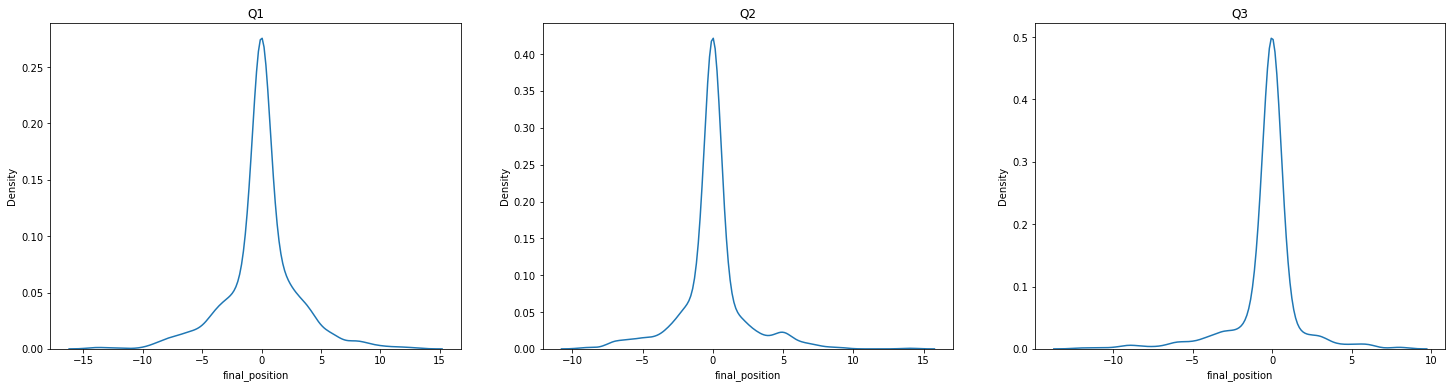

In [38]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
fig,axes=plt.subplots(1,3,figsize=(25,6))
dif1=y_test-dq1
sn.kdeplot(dif1,ax=axes[0])
axes[0].set_title('Q1')
dif2=y_test_2-dq2
sn.kdeplot(dif2,ax=axes[1])
axes[1].set_title('Q2')
dif3=y_test_3-dq3
sn.kdeplot(dif3,ax=axes[2])
axes[2].set_title('Q3')

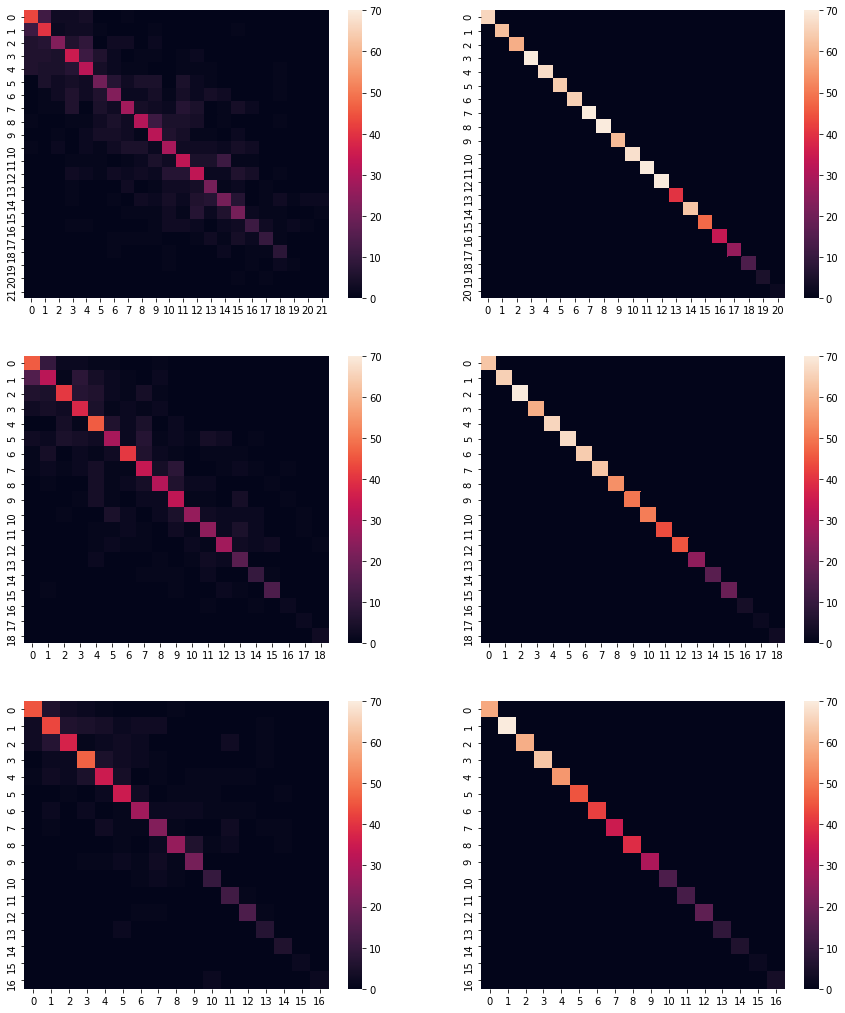

In [39]:
fig,axes=plt.subplots(3,2,figsize=(15,18))
cm = pd.DataFrame(confusion_matrix(y_test, dq1))
sn.heatmap(cm,ax=axes[0,0], vmin=0,vmax=70 )
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test))
sn.heatmap(cm1,ax=axes[0,1], vmin=0,vmax=70 )
cm3 = pd.DataFrame(confusion_matrix(y_test_2, dq2))
sn.heatmap(cm3,ax=axes[1,0], vmin=0,vmax=70 )
cm4 = pd.DataFrame(confusion_matrix(y_test_2, y_test_2))
sn.heatmap(cm4,ax=axes[1,1], vmin=0,vmax=70 )
cm5 = pd.DataFrame(confusion_matrix(y_test_3, dq3))
sn.heatmap(cm5,ax=axes[2,0], vmin=0,vmax=70 )
cm6 = pd.DataFrame(confusion_matrix(y_test_3, y_test_3))
sn.heatmap(cm6,ax=axes[2,1], vmin=0,vmax=70 )


## RandomForest

In [40]:
random_forest=RandomForestClassifier()
param_grid={
    "criterion":['gini','entropy'],
    "max_depth":[107],
    'n_estimators':[100,200,300,400,500],
    "max_features":['auto','sqrt','log2'],
    'min_impurity_decrease':[0,0.05,0.1,0.15],
    "random_state":[1]   
}
test_model=model_selection.GridSearchCV(estimator=random_forest,param_grid=param_grid,
                                       scoring='accuracy',verbose=10)
test_model.fit(X_train_2,y_train_2)
print(test_model.best_score_)
print(test_model.best_estimator_.get_params())

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.654, total=   0.6s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.674, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.674, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.664, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=100, random_state=1, score=0.651, total=   0.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.658, total=   1.1s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.692, total=   1.0s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.8s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.676, total=   1.1s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.8s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.670, total=   1.0s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=200, random_state=1, score=0.651, total=   1.1s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1, score=0.668, total=   1.6s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1, score=0.682, total=   1.6s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1 
[CV]  criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimators=300, random_state=1, score=0.684, total=   1.5s
[CV] criterion=gini, max_depth=107, max_features=auto, min_impurity_decrease=0, n_estimato

KeyboardInterrupt: ignored

In [41]:
rf=RandomForestClassifier(max_depth=107,random_state=8)
rf_2=RandomForestClassifier(max_depth=107,random_state=8)
rf_3=RandomForestClassifier(max_depth=107,random_state=8)
rf.fit(X_train, y_train)
rf_2.fit(X_train_2, y_train_2)
rf_3.fit(X_train_3, y_train_3)
rtq1= rf.predict(X_train)
rq1 = rf.predict(X_test)
rtq2= rf_2.predict(X_train_2)
rq2 = rf_2.predict(X_test_2)
rtq3= rf_3.predict(X_train_3)
rq3 = rf_3.predict(X_test_3)

In [42]:
print('Accuracy via prediction on training set q1: ', accuracy_score(y_train, rtq1))
print('Accuracy via prediction on test set q1: ', accuracy_score(y_test, rq1))
print('Accuracy via prediction on training set q2: ', accuracy_score(y_train_2, rtq2))
print('Accuracy via prediction on test set q2: ', accuracy_score(y_test_2, rq2))
print('Accuracy via prediction on training set q3: ', r2_score(y_train_3, rtq3))
print('Accuracy via prediction on test set q3: ', accuracy_score(y_test_3, rq3))

Accuracy via prediction on training set q1:  1.0
Accuracy via prediction on test set q1:  0.6798561151079137
Accuracy via prediction on training set q2:  1.0
Accuracy via prediction on test set q2:  0.6986794717887155
Accuracy via prediction on training set q3:  1.0
Accuracy via prediction on test set q3:  0.786096256684492


Text(0.5, 1.0, 'Q3')

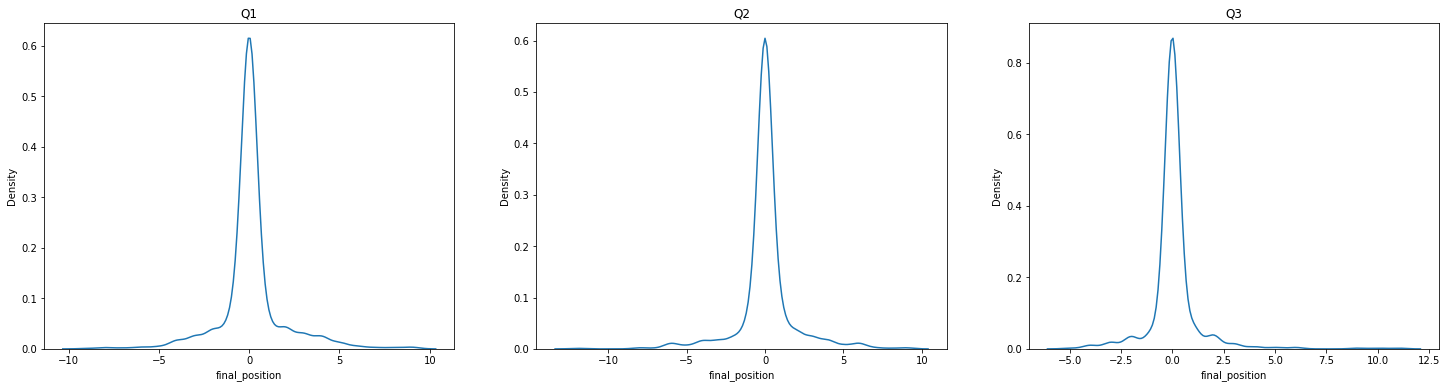

In [43]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
fig,axes=plt.subplots(1,3,figsize=(25,6))
dif1=y_test-rq1
sn.kdeplot(dif1,ax=axes[0])
axes[0].set_title('Q1')
dif2=y_test_2-rq2
sn.kdeplot(dif2,ax=axes[1])
axes[1].set_title('Q2')
dif3=y_test_3-rq3
sn.kdeplot(dif3,ax=axes[2])
axes[2].set_title('Q3')

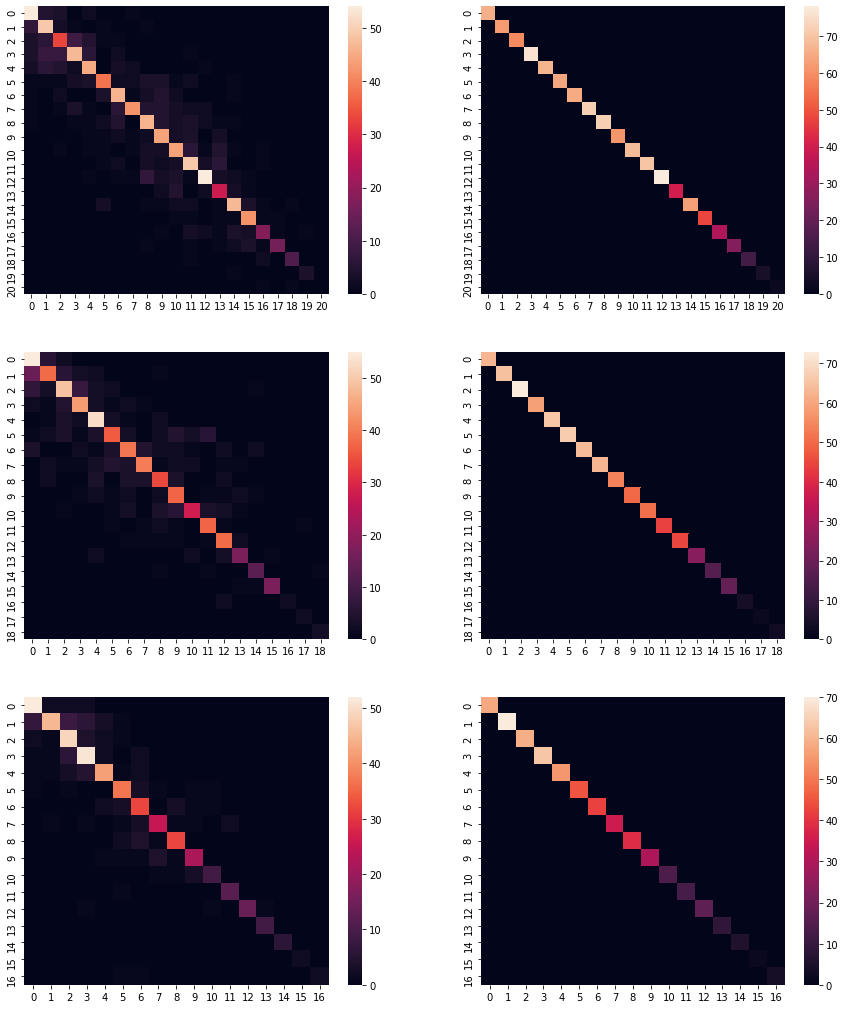

In [44]:
fig,axes=plt.subplots(3,2,figsize=(15,18))
cm = pd.DataFrame(confusion_matrix(y_test, rq1))
sn.heatmap(cm,ax=axes[0,0])
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test))
sn.heatmap(cm1,ax=axes[0,1])
cm3 = pd.DataFrame(confusion_matrix(y_test_2, rq2))
sn.heatmap(cm3,ax=axes[1,0])
cm4 = pd.DataFrame(confusion_matrix(y_test_2, y_test_2))
sn.heatmap(cm4,ax=axes[1,1])
cm5 = pd.DataFrame(confusion_matrix(y_test_3, rq3))
sn.heatmap(cm5,ax=axes[2,0])
cm6 = pd.DataFrame(confusion_matrix(y_test_3, y_test_3))
sn.heatmap(cm6,ax=axes[2,1])


## Extra Trees

In [45]:
etc=ExtraTreesClassifier(max_depth=107)
etc_2=ExtraTreesClassifier(max_depth=107)
etc_3=ExtraTreesClassifier(max_depth=107)
etc.fit(X_train, y_train)
etc_2.fit(X_train_2, y_train_2)
etc_3.fit(X_train_3, y_train_3)
etq1= rf.predict(X_train)
eq1 = rf.predict(X_test)
etq2= rf_2.predict(X_train_2)
eq2 = rf_2.predict(X_test_2)
etq3= rf_3.predict(X_train_3)
eq3 = rf_3.predict(X_test_3)

In [46]:
print('Accuracy via prediction on training set q1: ', accuracy_score(y_train, etq1))
print('Accuracy via prediction on test set q1: ', accuracy_score(y_test, eq1))
print('Accuracy via prediction on training set q2: ', accuracy_score(y_train_2, etq2))
print('Accuracy via prediction on test set q2: ', accuracy_score(y_test_2, eq2))
print('Accuracy via prediction on training set q3: ', r2_score(y_train_3, etq3))
print('Accuracy via prediction on test set q3: ', accuracy_score(y_test_3, eq3))

Accuracy via prediction on training set q1:  1.0
Accuracy via prediction on test set q1:  0.6798561151079137
Accuracy via prediction on training set q2:  1.0
Accuracy via prediction on test set q2:  0.6986794717887155
Accuracy via prediction on training set q3:  1.0
Accuracy via prediction on test set q3:  0.786096256684492


## SVM

In [ ]:
clf = svm.SVC()
param_grid={
    "kernel":[ 'rbf', 'sigmoid'],
    "degree":[3,4,5],
    "C":(1,20),
    "decision_function_shape":['ovo','ovr']
}

In [ ]:
s_vm=model_selection.GridSearchCV(estimator=clf,param_grid=param_grid,scoring="accuracy",verbose=10,cv=5,n_jobs=1)
s_vm.fit(X_train_2,y_train_2)
print(s_vm.best_score_)
print(s_vm.best_estimator_.get_params())

In [ ]:
clf.fit(X_train, y_train)
tr3=clf.predict(X_train)
y3=clf.predict(X_test)

In [ ]:
print('R squared via prediction on training set: ', r2_score(y_train, tr3))
print('R squared via prediction on test set: ', r2_score(y_test, y3))

In [ ]:
difference=y_test-y3
sns.kdeplot(difference)

In [ ]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
fig,axes=plt.subplots(1,2,figsize=(15,6))
cm = pd.DataFrame(confusion_matrix(y_test, y3))
sn.heatmap(cm,ax=axes[0])
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test))
sn.heatmap(cm1,ax=axes[1])
score = accuracy_score(y_test, y3)
score

## HyperOpt

In [50]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn

  Cloning https://github.com/hyperopt/hyperopt-sklearn to /tmp/pip-req-build-pmd_3sra
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn /tmp/pip-req-build-pmd_3sra
     |████████████████████████████████| 154 kB 8.3 MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-0.0.3-py3-none-any.whl size=27011 sha256=2a4d73acd56b8aba1c81952a0426b8b3a4bc96ce5a411f6873b3a094dbada4c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-vqleq309/wheels/4b/06/53/c35e360ca94aa0ab93518bf53abe5fb270c95dbe56b8e2e76b
Successfully built hpsklearn


In [51]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe
from hpsklearn import random_forest,svc,knn,extra_trees

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [52]:
model = HyperoptEstimator(classifier=any_classifier('clf'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, trial_timeout=30)

In [53]:
X_train = np.asarray(X_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [54]:
model.fit(X_train, y_train)
# summarize performance
acc = model.score(X_test, y_test)
print("Accuracy: %.3f" % acc)
# summarize the best model
print(model.best_model())

100%|██████████| 1/1 [00:00<00:00,  8.71it/s, best loss: 0.5367316341829085]
Accuracy: 0.522
{'learner': ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None,
                     max_features=0.17072140485094556, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=622, n_jobs=1, oob_score=False,
                     random_state=0, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}


In [55]:
y4 = model.predict(X_test)
acc = accuracy_score(y_test, y4)
print("Accuracy: %.3f" % acc)

Accuracy: 0.522


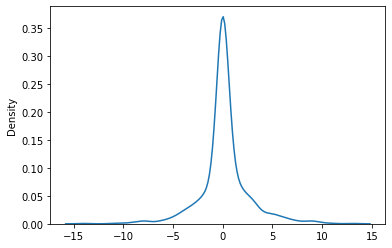

In [56]:
difference=y_test-y4
sns.kdeplot(difference)

0.5215827338129496

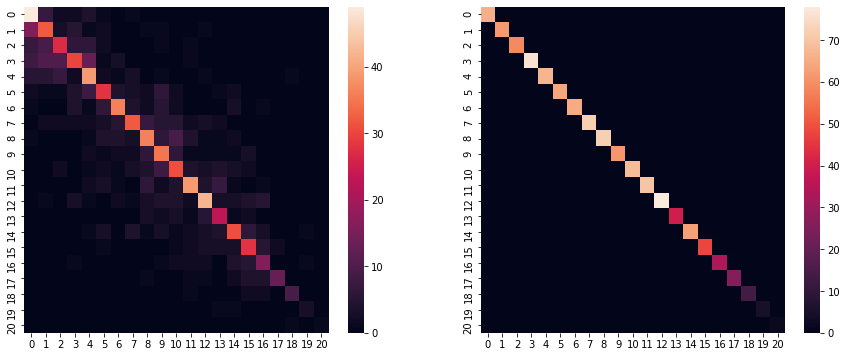

In [57]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
fig,axes=plt.subplots(1,2,figsize=(15,6))
cm = pd.DataFrame(confusion_matrix(y_test, y4))
sn.heatmap(cm,ax=axes[0])
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test))
sn.heatmap(cm1,ax=axes[1])
score = accuracy_score(y_test, y4)
score

# ANN

In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

## Q1 

In [59]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
X_train.shape

(3333, 11)

In [61]:
y_train=pd.get_dummies(y_train)

In [62]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(103, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(512, activation='relu'))
ann.add(tf.keras.layers.Dense(256, activation='relu'))
ann.add(tf.keras.layers.Dense(22, activation='softmax'))

In [63]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 103)               1236      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              106496    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 22)                5654      
Total params: 1,819,114
Trainable params: 1,819,114
Non-trainable params: 0
______________________________________________

In [64]:
ann.fit(X_train, y_train, epochs=100)

Epoch 1/100
105/105 [==============================] - 4s 3ms/step - loss: 2.5629 - accuracy: 0.1329
Epoch 2/100
105/105 [==============================] - 0s 3ms/step - loss: 2.3651 - accuracy: 0.1818
Epoch 3/100
105/105 [==============================] - 0s 3ms/step - loss: 2.3013 - accuracy: 0.1833
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 2.2354 - accuracy: 0.2160
Epoch 5/100
105/105 [==============================] - 0s 3ms/step - loss: 2.1813 - accuracy: 0.2235
Epoch 6/100
105/105 [==============================] - 0s 3ms/step - loss: 2.1042 - accuracy: 0.2475
Epoch 7/100
105/105 [==============================] - 0s 3ms/step - loss: 2.0333 - accuracy: 0.2730
Epoch 8/100
105/105 [==============================] - 0s 3ms/step - loss: 1.9337 - accuracy: 0.3072
Epoch 9/100
105/105 [==============================] - 0s 3ms/step - loss: 1.8423 - accuracy: 0.3396
Epoch 10/100
105/105 [==============================] - 0s 3ms/step - loss: 1.7410 - accura

In [65]:
y_pred = ann.predict(X_test)

y_pred_train=ann.predict(X_train)


In [66]:
predictions=[0]*y_pred.shape[0]

for i in range(y_pred.shape[0]):
    predictions[i]=np.argmax(y_pred[i])+1

In [67]:

print('R squared via prediction on test set: ', accuracy_score(y_test,predictions))

R squared via prediction on test set:  0.4685251798561151


## Q2

In [68]:
X_train = np.asarray(X_train_2).astype(np.float32)
X_test = np.asarray(X_test_2).astype(np.float32)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
y_train=pd.get_dummies(y_train_2)

In [70]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(103, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(512, activation='relu'))
ann.add(tf.keras.layers.Dense(256, activation='relu'))
ann.add(tf.keras.layers.Dense(20, activation='softmax'))

In [71]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 103)               1442      
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              106496    
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 20)                5140      
Total params: 1,818,806
Trainable params: 1,818,806
Non-trainable params: 0
____________________________________________

In [72]:
ann.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 1s 3ms/step - loss: 2.4938 - accuracy: 0.1553
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 2.3027 - accuracy: 0.1881
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 2.2447 - accuracy: 0.1965
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 2.1756 - accuracy: 0.2289
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 2.1093 - accuracy: 0.2573
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 2.0189 - accuracy: 0.2845
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 1.9322 - accuracy: 0.3029
Epoch 8/100
79/79 [==============================] - 0s 3ms/step - loss: 1.8327 - accuracy: 0.3449
Epoch 9/100
79/79 [==============================] - 0s 3ms/step - loss: 1.7316 - accuracy: 0.3798
Epoch 10/100
79/79 [==============================] - 0s 3ms/step - loss: 1.6638 - accuracy: 0.4046
Epoch 11/

In [73]:
y_pred = ann.predict(X_test)
y_pred_train=ann.predict(X_train)

In [74]:
test_predictions=[0]*y_pred.shape[0]
for i in range(y_pred.shape[0]):
    test_predictions[i]=np.argmax(y_pred[i])+1
train_predictions=[0]*y_pred_train.shape[0]
for i in range(y_pred_train.shape[0]):
    train_predictions[i]=np.argmax(y_pred_train[i])+1

In [75]:
print('Accuracy via prediction on test set: ', accuracy_score(y_test_2,test_predictions))
print('Accuracy via prediction on test set: ', accuracy_score(y_train_2,train_predictions))

Accuracy via prediction on test set:  0.5690276110444178
Accuracy via prediction on test set:  0.9939975990396158


## Q3 

In [76]:
X_train = np.asarray(X_train_3).astype(np.float32)
X_test = np.asarray(X_test_3).astype(np.float32)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
y_train=pd.get_dummies(y_train_3)

In [78]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(103, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(1024, activation='relu'))
ann.add(tf.keras.layers.Dense(512, activation='relu'))
ann.add(tf.keras.layers.Dense(256, activation='relu'))
ann.add(tf.keras.layers.Dense(19, activation='softmax'))

In [79]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 103)               1648      
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              106496    
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 19)                4883      
Total params: 1,818,755
Trainable params: 1,818,755
Non-trainable params: 0
____________________________________________

In [84]:
ann.fit(X_train, y_train, epochs=75)

Epoch 1/75
53/53 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9173
Epoch 2/75
53/53 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9346
Epoch 3/75
53/53 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9488
Epoch 4/75
53/53 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9673
Epoch 5/75
53/53 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9643
Epoch 6/75
53/53 [==============================] - 0s 3ms/step - loss: 0.1275 - accuracy: 0.9590
Epoch 7/75
53/53 [==============================] - 0s 3ms/step - loss: 0.1686 - accuracy: 0.9441
Epoch 8/75
53/53 [==============================] - 0s 3ms/step - loss: 0.1385 - accuracy: 0.9530
Epoch 9/75
53/53 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.9518
Epoch 10/75
53/53 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.9572
Epoch 11/75
53/53 [

In [85]:
y_pred=ann.predict(X_test)
y_pred_train=ann.predict(X_train)

In [86]:
test_predictions=[0]*y_pred.shape[0]
for i in range(y_pred.shape[0]):
    test_predictions[i]=np.argmax(y_pred[i])+1
train_predictions=[0]*y_pred_train.shape[0]
for i in range(y_pred_train.shape[0]):
    train_predictions[i]=np.argmax(y_pred_train[i])+1

In [87]:
print('Accuracy via prediction on test set: ', accuracy_score(y_test_3,test_predictions))
print('Accuracy via prediction on test set: ', accuracy_score(y_train_3,train_predictions))

Accuracy via prediction on test set:  0.5757575757575758
Accuracy via prediction on test set:  0.9970255800118977
